In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn
%matplotlib inline

In [2]:
DATA_PATH = "../data/"

path = DATA_PATH + "Telco_data_clean.csv"

In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

,Unnamed: 0,Churn Label,CLTV,Referred a Friend,Number of Referrals,Tenure in Months,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,...,Offer_Offer B,Offer_Offer E,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check,refundBinned_No Refund,refundBinned_Refund
0,0,1,0.872912,0,-0.650362,-1.278897,0,1,-0.612931,0,...,0,0,1,0,0,1,0,0,1,0
1,1,1,0.762181,1,-0.317162,-0.993672,1,1,-0.172164,0,...,0,1,1,0,0,0,1,0,1,0
2,2,1,-1.032322,0,-0.650362,-0.586209,1,1,1.541931,0,...,0,0,1,0,0,1,0,0,0,1
3,3,1,0.791766,1,-0.317162,-0.300984,0,1,-0.417035,0,...,0,0,1,0,0,1,0,0,0,1
4,4,1,-1.358595,1,-0.317162,0.187973,1,1,-0.319086,0,...,0,0,1,0,0,1,0,0,1,0


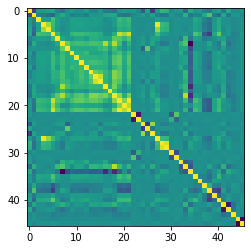

In [5]:
plt.imshow(df.corr())

In [6]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
def object_to_int(df):
    if df.dtype=='object':
        df = LabelEncoder().fit_transform(df)
    return df

In [9]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,Churn Label,CLTV,Referred a Friend,Number of Referrals,Tenure in Months,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,...,Offer_Offer B,Offer_Offer E,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check,refundBinned_No Refund,refundBinned_Refund
0,1,0.872912,0,-0.650362,-1.278897,0,1,-0.612931,0,0,...,0,0,1,0,0,1,0,0,1,0
1,1,0.762181,1,-0.317162,-0.993672,1,1,-0.172164,0,1,...,0,1,1,0,0,0,1,0,1,0
2,1,-1.032322,0,-0.650362,-0.586209,1,1,1.541931,0,0,...,0,0,1,0,0,1,0,0,0,1
3,1,0.791766,1,-0.317162,-0.300984,0,1,-0.417035,0,1,...,0,0,1,0,0,1,0,0,0,1
4,1,-1.358595,1,-0.317162,0.187973,1,1,-0.319086,0,0,...,0,0,1,0,0,1,0,0,1,0


In [10]:
from sklearn.model_selection import train_test_split
target = 'Churn Label'
X = df.drop(target, axis=1)
Y = df[target]
training_features, testing_features, training_target, testing_target = train_test_split(X, Y,
                     test_size=0.15, train_size=None, random_state=None, shuffle=True, stratify=None)

In [11]:
training_features.head()

,CLTV,Referred a Friend,Number of Referrals,Tenure in Months,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,...,Offer_Offer B,Offer_Offer E,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check,refundBinned_No Refund,refundBinned_Refund
1811,1.308224,0,-0.650362,-1.156658,1,1,1.492957,0,1,0,...,0,0,1,0,0,1,0,0,1,0
6800,0.776551,0,-0.650362,0.147226,1,1,-0.808828,0,1,1,...,0,0,0,1,0,1,0,0,1,0
1430,0.591437,0,-0.650362,-1.238151,1,1,-0.661905,0,0,1,...,0,0,1,0,0,1,0,0,1,0
1120,1.764669,1,2.348439,1.206632,0,1,0.415526,1,0,1,...,1,0,0,0,1,0,1,0,1,0
2865,1.699583,1,-0.317162,0.921407,1,1,1.541931,0,0,0,...,1,0,1,0,0,1,0,0,1,0


#### Linear regression - Baseline

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
reg = LinearRegression().fit(training_features, training_target)

In [14]:
reg.score(testing_features, testing_target)

0.38593203394290765

#### Decision Tree

In [15]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=3)
model.fit(training_features, training_target)

DecisionTreeRegressor(max_depth=3)

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
pred = model.predict(testing_features)
print(testing_target.shape)
pred = np.where(pred < 0.5, 0, 1)
print(pred.shape)

(1057,)
(1057,)


In [18]:
accuracy_score(testing_target, pred)

0.7767265846736046

In [19]:
import graphviz
from sklearn import tree

In [20]:
dot_data = tree.export_graphviz(model, feature_names = list(training_features), filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data) 

In [21]:
graph.render(view=True)

'Source.gv.pdf'

#### Basic Algorithms

We start with some basic algorithms such as linear regression and random forests.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [23]:
seed = 0
# Logistic Regression
logreg = LogisticRegression()

# Support Vector Machines
sup_vec = SVC(gamma = "auto")

# Random Forest Classifier
random_forest = RandomForestClassifier(random_state = seed, n_estimators = 100)

# KNN
knn = KNeighborsClassifier()

# Gaussian Naive Bayes
gauss_bayes = GaussianNB()

# Decision Tree Classifier
dec_tree = DecisionTreeClassifier(max_depth = 4,random_state = 0)

# Gradient Boosting Classifier
grad_boost = GradientBoostingClassifier(random_state = 0)

# Adaboost Classifier
adaboost = AdaBoostClassifier(random_state = 0)

# ExtraTrees Classifier
extra_trees = ExtraTreesClassifier(random_state = 0)




modelNames = ["Logistic Regression", "Support vector machines", "Random forests", "KNN", "Gaussian Naive Bayes", "Decision Trees", "Gradient Boosting Classifier", "Adaboost Classifier", "ExtraTrees Classifier"]
models = [logreg, sup_vec, random_forest, knn, gauss_bayes, dec_tree, grad_boost, adaboost, extra_trees]


In [24]:
def calculateTrainAccuracy(model):
    """Returns training accuracy of a model."""
    
    model.fit(training_features, training_target)
    accuracy = model.score(testing_features, testing_target)
    accuracy = round(accuracy*100, 2)
    return accuracy



In [25]:
scores = [calculateTrainAccuracy(model) for model in models]
Accuracy = pd.DataFrame(scores, columns = ["Accuracy"], index=modelNames)
sorted_accuracy = Accuracy.sort_values(by="Accuracy", ascending=False)
display(sorted_accuracy)

/Users/lucienwalewski/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Accuracy
Logistic Regression,85.53
Gradient Boosting Classifier,85.53
Support vector machines,85.43
ExtraTrees Classifier,85.15
Random forests,84.67
Adaboost Classifier,84.48
KNN,82.31
Decision Trees,80.51
Gaussian Naive Bayes,78.24


In [26]:
df.head().T

,0,1,2,3,4
Churn Label,1.000000,1.000000,1.000000,1.000000,1.000000
CLTV,0.872912,0.762181,-1.032322,0.791766,-1.358595
Referred a Friend,0.000000,1.000000,0.000000,1.000000,1.000000
Number of Referrals,-0.650362,-0.317162,-0.650362,-0.317162,-0.317162
Tenure in Months,-1.278897,-0.993672,-0.586209,-0.300984,0.187973
Multiple Lines,0.000000,1.000000,1.000000,0.000000,1.000000
Internet Service,1.000000,1.000000,1.000000,1.000000,1.000000
Avg Monthly GB Download,-0.612931,-0.172164,1.541931,-0.417035,-0.319086
Online Security,0.000000,0.000000,0.000000,0.000000,0.000000
Online Backup,0.000000,1.000000,0.000000,1.000000,0.000000


In [ ]:
from sklearn.model_selection import cross_val_score
def Train_val_score(model):
    """Returns models' cross validation scores."""
    
    Training_cross_val = cross_val_score(model, training_features, training_target, cv = 10, scoring="accuracy").mean()
    Training_cross_val = round(Training_cross_val*100, 2)
    return Training_cross_val

# Calculate cross validation scores of all the models and store them in a dataframe
cross_scores = [Train_val_score(model) for model in models]
Training_cross_val = pd.DataFrame(cross_scores, columns = ["Train_cross_val"], index=modelNames)
sorted_cross_val = Training_cross_val.sort_values(by="Train_cross_val", ascending=False)
display(sorted_cross_val)

/Users/lucienwalewski/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/lucienwalewski/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/sta

In [ ]:
"""Define hyperparameters the logistic regression will be tuned with. For LR, the following hyperparameters are usually tunned."""
lrParams = {"penalty":["l1", "l2"],
            "C": np.logspace(0, 4, 10),
            "max_iter":[5000]}

"""For GBC, the following hyperparameters are usually tunned."""
gbcParams = {"learning_rate": [0.01, 0.02, 0.05, 0.01],
              "max_depth": [4, 6, 8],
              "max_features": [1.0, 0.3, 0.1], 
              "min_samples_split": [ 2, 3, 4],
              "random_state":[seed]}
svcParams = {"C": np.arange(6,13), 
              "kernel": ["linear","rbf"],
              "gamma": [0.5, 0.2, 0.1, 0.001, 0.0001]}

"""For DT, the following hyperparameters are usually tunned."""
dtParams = {"max_features": ["auto", "sqrt", "log2"],
             "min_samples_split": np.arange(2,16), 
             "min_samples_leaf":np.arange(1,12),
             "random_state":[seed]}
"""For RF, the following hyperparameters are usually tunned."""
rfParams = {"criterion":["gini","entropy"],
             "n_estimators":[10, 15, 20, 25, 30],
             "min_samples_leaf":[1, 2, 3],
             "min_samples_split":np.arange(3,8), 
             "max_features":["sqrt", "auto", "log2"],
             "random_state":[44]}

"""For KNN, the following hyperparameters are usually tunned."""
knnParams = {"n_neighbors":np.arange(3,9),
              "leaf_size":[1, 2, 3, 5],
              "weights":["uniform", "distance"],
              "algorithm":["auto", "ball_tree","kd_tree","brute"]}
"""For ABC, the following hyperparameters are usually tunned."""
abcParams = {"n_estimators":[1, 5, 10, 15, 20, 25, 40, 50, 60, 80, 100, 130, 160, 200, 250, 300],
              "learning_rate":[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5],
              "random_state":[seed]}

"""For ETC, the following hyperparameters are usually tunned."""
etcParams = {"max_depth":[None],
              "max_features":[1, 3, 10],
              "min_samples_split":[2, 3, 10],
              "min_samples_leaf":[1, 3, 10],
              "bootstrap":[False],
              "n_estimators":[100, 300],
              "criterion":["gini"], 
              "random_state":[seed]}


In [ ]:
from sklearn.model_selection import GridSearchCV
def tuneHyperparameters(model, params):
    """Returns best score of a model and its corresponding hyperparameters.
    model = model to be optimized.
    params = hyperparameters the models will be optimized with."""
    
    # Construct grid search object with 10 fold cross validation.
    gridSearch = GridSearchCV(model, params, verbose=0, cv=10, scoring="accuracy", n_jobs = -1)
    # Fit using grid search.
    gridSearch.fit(training_features, training_target)
    bestParams, bestScore = gridSearch.best_params_, round(gridSearch.best_score_*100, 2)
    return bestScore, bestParams

In [ ]:
"""Due to computational restrictions, I won't optimise xgbc's hyperparameters."""
modelNamesToTune = [x for x in modelNames if x not in ["GNB","XGBC"]]
modelsToTune = [logreg, sup_vec, random_forest, knn, dec_tree, grad_boost, adaboost, extra_trees]
parametersLists = [lrParams, svcParams, rfParams, knnParams, dtParams, gbcParams, abcParams, etcParams]
bestScoreAndHyperparameters = [tuneHyperparameters(model,param) for (model,param) in zip(modelsToTune,parametersLists)]

In [ ]:
"""Let's create a dataframe to store best score and best params."""
bestScoreAndHyperparameters = pd.DataFrame(bestScoreAndHyperparameters,
                                             index=modelNamesToTune,
                                             columns=["tunedAccuracy", "bestHyperparameters"])
bestScoreAndHyperparametersSorted = bestScoreAndHyperparameters.sort_values(by="tunedAccuracy",
                                                                                ascending=False)
bold("Model's Accuracy after Tuning Hyperparameters:")
display(bestScoreAndHyperparametersSorted.iloc[:,0].to_frame())

In [ ]:
"""Let's create a dataframe to store best score and best params."""
bestScoreAndHyperparameters = pd.DataFrame(bestScoreAndHyperparameters,
                                             index=modelNamesToTune,
                                             columns=["tunedAccuracy", "bestHyperparameters"])
bestScoreAndHyperparametersSorted = bestScoreAndHyperparameters.sort_values(by="tunedAccuracy",
                                                                                ascending=False)
bold("Model's Accuracy after Tuning Hyperparameters:")
display(bestScoreAndHyperparametersSorted.iloc[:,0].to_frame())

In [ ]:
"""Create a function that compares cross validation scores with tunned scores for different models by
plotting them."""
def compareModelsAccuracy():
    """Returns a stack bar chart of tuned and x validation scores of models."""
    
    # Sort by index and converting to series object to plot.
    xValScore = sorted_cross_val[~sorted_cross_val.index.isin(["GNB"])].sort_index().T.squeeze()
    tunedScore = bestScoreAndHyperparametersSorted.iloc[:,0].sort_index().T.squeeze()
        # Create two subplots of stack bar chart
    fig=make_subplots(
        rows=1, 
        cols=1,
        vertical_spacing=0.3,
        print_grid=False) # This suppresses "This is the format of your plot grid:" text from popping out.

    # Add trace for stack bar
    fig.add_trace(go.Bar(x=xValScore.index,
                             y=xValScore,
                             text=xValScore,
                             hoverinfo="x+y",
                             textposition="auto",
                             name="xValScore",
                             textfont=dict(family="sans serif",size=14),
                             ),
                     row=1,
                     col=1
                     )

    # Add another trace for stack bar
    fig.add_trace(go.Bar(x=tunedScore.index,
                             y=tunedScore,
                             text=tunedScore,
                             hoverinfo="x+y",
                             textposition="auto",
                             name="tunedScores",
                             textfont=dict(family="sans serif",size=14),
                             ),
                     row=1,
                     col=1
                     )
        
    # Update the layout. Add title, dimension, and background color
    fig.layout.update(
        height=600, 
        width=950,
        hovermode="closest",
        barmode = "stack",
        title_text = "Cross Vaidation Scores vs Optimized Scores",
        paper_bgcolor="rgb(243, 243, 243)",
        plot_bgcolor="rgb(243, 243, 243)"
        )

    # Set y-axis titles in bold
    fig.layout.yaxis1.update(title="<b>%Accuracy</b>")
    
    # Set x-axis title in bold
    fig.layout.xaxis1.update(title="<b>Models</b>")
    return fig.show()

"""Call the function to plot the scores."""
compareModelsAccuracy()

In [ ]:
"""Instantiate the models with optimized hyperparameters."""
# Sort the dataframe by index and select bestHyperparameters column
tunedParams = bestScoreAndHyperparametersSorted.sort_index().loc[:,"bestHyperparameters"]
abc = AdaBoostClassifier(**tunedParams["ABC"])
dt  = DecisionTreeClassifier(**tunedParams["DT"])
etc = ExtraTreesClassifier(**tunedParams["ETC"])
gbc = GradientBoostingClassifier(**tunedParams["GBC"])
knn = KNeighborsClassifier(**tunedParams["KNN"])
lr  = LogisticRegression(**tunedParams["LR"])
rf  = RandomForestClassifier(**tunedParams["RF"])
svc = SVC(**tunedParams["SVC"])


In [ ]:
"""Train all the models with optimised hyperparameters."""
models = [abc, dt, etc, gbc, knn, lr, rf, svc]
modelNames = tunedParams.index.values
keyValue = dict(zip(modelNames, models))
bold("10-fold Cross Validation after Optimization:")
xValScore = []
for key, value in keyValue.items():
    # Train the models with optimized parameters using cross validation.
    # No need to fit the data. cross_val_score does that for us.
    # But we need to fit train data for prediction in the follow session.
    value.fit(xTrain, yTrain)
    scores = cross_val_score(value, xTrain, yTrain, cv = 10, scoring="accuracy")*100
    xValScore.append(scores.mean())
    print("Mean Accuracy: {:.4f} (+/- {:.4f}) [{}]".format(scores.mean(), scores.std(), key))

In [ ]:
"""Make prediction using all the trained models."""
modelPrediction = pd.DataFrame({"RF":rf.predict(xTest),
                                 "GBC":gbc.predict(xTest),
                                 "ABC":abc.predict(xTest),
                                 "ETC":etc.predict(xTest), 
                                 "DT":dt.predict(xTest),
                                 "SVC":svc.predict(xTest), 
                                 "KNN":knn.predict(xTest), 
                                 "LR":lr.predict(xTest)
                                })

"""Let"s see how each model classifies a prticular class."""
bold("All the Models Prediction:")
display(modelPrediction.head())

In [ ]:
"""Create a function that plot feature importance by the selected tree based models."""
def plotFeatureImportance(model):
    """Return a plot of feature importance by model."""
    
    importance = pd.DataFrame({"feature": xTrain.columns,
                              "importance": np.round(model.feature_importances_,3)})
    importanceSorted = importance.sort_values(by = "importance", ascending = False).set_index("feature")
    return importanceSorted

"""Create subplots of feature impotance of rf, gbc, dt, etc, and abc."""
fig, axes = plt.subplots(3,2, figsize = (20,40))
fig.suptitle("Tree Based Models Feature Importance", fontsize = 28)
treeModels = [rf, gbc, dt, etc, abc]
treeModelNames = ["RF", "GBC", "DT", "ETC", "ABC"]
for ax, model, name in zip(axes.flatten(), treeModels, treeModelNames):
    plotFeatureImportance(model).plot.barh(ax=ax, title=name, fontsize=18, color="green")
    ax.set_ylabel("Features", fontsize = 15)
fig.delaxes(ax = axes[2,1]) # We don"t need the last subplot.
fig.tight_layout(rect = [0, 0.03, 1, 0.97])

In [ ]:
"""Let's plot feature importance of LR."""
fig, ax = plt.subplots(figsize=(18,4))
coeff = pd.DataFrame({"feature":xTrain.columns,
                      "importance":np.transpose(lr.coef_[0])})

coeff.sort_values(by = "importance").set_index("feature")\
.plot.bar(title = "Feature Importance of Linear Model (LR)", color="chocolate", ax=ax)
ax.tick_params(axis = "both", which = "major", labelsize = 15)
ax.tick_params(axis = "both", which = "minor", labelsize = 15)
ax.set_xlabel("Feature", fontsize = 15)
plt.show()

In [ ]:
"""Create a function that returns learning curves for different classifiers."""
def plotLearningCurve(model):
    """Returns a plot of learning curve of a model."""
    
    # Create feature matrix and target vector
    X, y = xTrain, yTrain
    # Create CV training and test scores for various training set sizes
    trainSizes, trainScores, testScores = learning_curve(model, X, y, cv = 10,
                                                    scoring="accuracy", n_jobs = -1, 
                                                    train_sizes = np.linspace(0.01, 1.0, 17), # 17 different sizes of the training set
                                                    random_state = seed)
    # Create means and standard deviations of training set scores
    trainMean = np.mean(trainScores, axis = 1)
    trainStd = np.std(trainScores, axis = 1)

    # Create means and standard deviations of test set scores
    testMean = np.mean(testScores, axis = 1)
    testStd = np.std(testScores, axis = 1)

    # Draw lines
    plt.plot(trainSizes, trainMean, "o-", color = "red",  label = "training score")
    plt.plot(trainSizes, testMean, "o-", color = "green", label = "cross-validation score")
    
    # Draw bands
    plt.fill_between(trainSizes, trainMean - trainStd, trainMean + trainStd, alpha = 0.1, color = "r") # Alpha controls band transparency.
    plt.fill_between(trainSizes, testMean - testStd, testMean + testStd, alpha = 0.1, color = "g")
    
    # Create plot
    font_size = 15
    plt.xlabel("Training Set Size", fontsize = font_size)
    plt.ylabel("Accuracy Score", fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.yticks(fontsize = font_size)
    plt.legend(loc = "best")
    plt.grid()

In [ ]:
 """Now plot learning curves of the optimized models in subplots."""
plt.figure(figsize = (25,25))
lcModels = [rf, gbc, dt, etc, abc, knn, svc, lr]
lcLabels = ["RF", "GBC", "DT", "ETC", "ABC", "KNN", "SVC", "LR"]

for ax, model, label in zip (range(1,9), lcModels, lcLabels):
    plt.subplot(4,2,ax)
    plotLearningCurve(model)
    plt.title(label, fontsize = 18)
plt.suptitle("Learning Curves of Optimized Models", fontsize = 28)
plt.tight_layout(rect = [0, 0.03, 1, 0.97])